In [1]:
#教程参考：https://www.tensorflow.org/tutorials/audio/music_generation
#训练网络需要大改，目前训练跟水一样
import collections
import datetime
import fluidsynth
import glob
import numpy as np
import pathlib
import pandas as pd
import pretty_midi
import seaborn as sns
import tensorflow as tf

from IPython import display
from matplotlib import pyplot as plt
from typing import Dict, List, Optional, Sequence, Tuple

#全局变量
随机种子 = 42
tf.random.set_seed(随机种子)
np.random.seed(随机种子)
音频采样率 = 44100

In [2]:
数据集路径 = pathlib.Path('FourSeasons')
import os
for dirname, _, 文件名 in os.walk(数据集路径):
    for filename in 文件名:
        print(os.path.join(dirname, filename))
#if not data_dir.exists():
#  tf.keras.utils.get_file(
#      'maestro-v2.0.0-midi.zip',
#      origin='https://storage.googleapis.com/magentadata/datasets/maestro/v2.0.0/maestro-v2.0.0-midi.zip',
#      extract=True,
#      cache_dir='.', cache_subdir='data',
#  )
文件名 = glob.glob(str(数据集路径/'*.mid*'))
print('文件数:', len(文件名))

FourSeasons\autumn_no1_allegro_gp.mid
FourSeasons\autumn_no2_adagio_gp.mid
FourSeasons\autumn_no3_allegro_gp.mid
FourSeasons\spring_no1_allegro_gp.mid
FourSeasons\spring_no2_adagio_gp.mid
FourSeasons\spring_no3_allegro_gp.mid
FourSeasons\summer_no3_presto_gp.mid
FourSeasons\summer_no4_allegro_gp.mid
FourSeasons\summer_no5_adagio_gp.mid
FourSeasons\winter_no1_allegro_non_molto_gp.mid
FourSeasons\winter_no2_largo_gp.mid
FourSeasons\winter_no3_allegro_gp.mid
文件数: 12


In [3]:
示例文件 = 文件名[0]
print(示例文件)

pm = pretty_midi.PrettyMIDI(示例文件)
def display_audio(pm: pretty_midi.PrettyMIDI, seconds=30):
  waveform = pm.fluidsynth(fs=音频采样率)
  # Take a sample of the generated waveform to mitigate kernel resets
  waveform_short = waveform[:seconds*音频采样率]
  return display.Audio(waveform_short, rate=音频采样率)

from midi2audio import FluidSynth
fs = FluidSynth()
#fs.play_midi(示例文件)

# using the default sound font in 44100 Hz sample rate

#fs.midi_to_audio(示例文件, '数据集示例.wav')

#display_audio(pm)

FourSeasons\autumn_no1_allegro_gp.mid


In [4]:
print('使用的乐器数量', len(pm.instruments))
乐器 = {}
乐器名 = {}
for i in range(len(pm.instruments)):
    乐器[i] = pm.instruments[i]
    乐器名[i] = pretty_midi.program_to_instrument_name(乐器[i].program)
    print('乐器名称:', 乐器名[i])

使用的乐器数量 16
乐器名称: Harpsichord
乐器名称: Harpsichord
乐器名称: String Ensemble 1
乐器名称: Violin
乐器名称: String Ensemble 1
乐器名称: String Ensemble 1
乐器名称: String Ensemble 1
乐器名称: Synth Strings 2
乐器名称: String Ensemble 1
乐器名称: String Ensemble 1
乐器名称: Synth Strings 1
乐器名称: Synth Strings 1
乐器名称: Synth Strings 1
乐器名称: Synth Strings 1
乐器名称: Synth Strings 1
乐器名称: Acoustic Bass


In [5]:
for j in range(len(pm.instruments)):
    print('乐器名称:', 乐器名[j])
    for i, note in enumerate(乐器[j].notes[:10]):
      note_name = pretty_midi.note_number_to_name(note.pitch)
      duration = note.end - note.start
      print(f'{i}: 音高={note.pitch}, 音符={note_name},'
            f' 音长={duration:.4f}')

乐器名称: Harpsichord
0: 音高=60, 音符=C4, 音长=0.4839
1: 音高=65, 音符=F4, 音长=0.4839
2: 音高=68, 音符=G#4, 音长=0.4839
3: 音高=72, 音符=C5, 音长=0.8065
4: 音高=60, 音符=C4, 音长=0.4839
5: 音高=64, 音符=E4, 音长=0.4839
6: 音高=67, 音符=G4, 音长=0.4839
7: 音高=70, 音符=A#4, 音长=0.8065
8: 音高=60, 音符=C4, 音长=0.4839
9: 音高=65, 音符=F4, 音长=0.4839
乐器名称: Harpsichord
0: 音高=50, 音符=D3, 音长=0.3846
1: 音高=48, 音符=C3, 音长=0.3846
2: 音高=47, 音符=B2, 音长=0.3846
3: 音高=45, 音符=A2, 音长=0.3846
4: 音高=44, 音符=G#2, 音长=0.3846
5: 音高=41, 音符=F2, 音长=0.3846
6: 音高=40, 音符=E2, 音长=0.3846
7: 音高=38, 音符=D2, 音长=0.3846
8: 音高=44, 音符=G#2, 音长=0.4902
9: 音高=32, 音符=G#1, 音长=0.4902
乐器名称: String Ensemble 1
0: 音高=81, 音符=A5, 音长=0.0833
1: 音高=77, 音符=F5, 音长=0.0833
2: 音高=81, 音符=A5, 音长=0.0833
3: 音高=77, 音符=F5, 音长=0.0833
4: 音高=81, 音符=A5, 音长=0.0833
5: 音高=77, 音符=F5, 音长=0.0833
6: 音高=82, 音符=A#5, 音长=0.0833
7: 音高=79, 音符=G5, 音长=0.0833
8: 音高=81, 音符=A5, 音长=0.3698
9: 音高=77, 音符=F5, 音长=0.3698
乐器名称: Violin
0: 音高=81, 音符=A5, 音长=0.0833
1: 音高=77, 音符=F5, 音长=0.0833
2: 音高=81, 音符=A5, 音长=0.0833
3: 音高=77, 音符=F5, 音长=0.0833
4: 

In [6]:
#将midi解析成notes

def midi_to_notes(midi_file: str) -> pd.DataFrame:
  pm = pretty_midi.PrettyMIDI(midi_file)
  instrument = pm.instruments[0]
  notes = collections.defaultdict(list)

  # Sort the notes by start time
  sorted_notes = sorted(instrument.notes, key=lambda note: note.start)
  prev_start = sorted_notes[0].start

  for note in sorted_notes:
    start = note.start
    end = note.end
    notes['pitch'].append(note.pitch)
    notes['start'].append(start)
    notes['end'].append(end)
    notes['step'].append(start - prev_start)
    notes['duration'].append(end - start)
    prev_start = start

  return pd.DataFrame({name: np.array(value) for name, value in notes.items()})

In [7]:
raw_notes = midi_to_notes(示例文件)
raw_notes.head()

,pitch,start,end,step,duration
0,60,207.656134,208.140004,0.000000,0.483870
1,65,208.140004,208.623875,0.483870,0.483871
2,68,208.623875,209.107745,0.483871,0.483870
3,72,209.107745,209.914196,0.483870,0.806451
4,60,211.527098,212.010968,2.419353,0.483870


In [8]:
get_note_names = np.vectorize(pretty_midi.note_number_to_name)
sample_note_names = get_note_names(raw_notes['pitch'])
sample_note_names[:10]

array(['C4', 'F4', 'G#4', 'C5', 'C4', 'E4', 'G4', 'A#4', 'C4', 'F4'],
      dtype='<U3')

所有音符音高音长


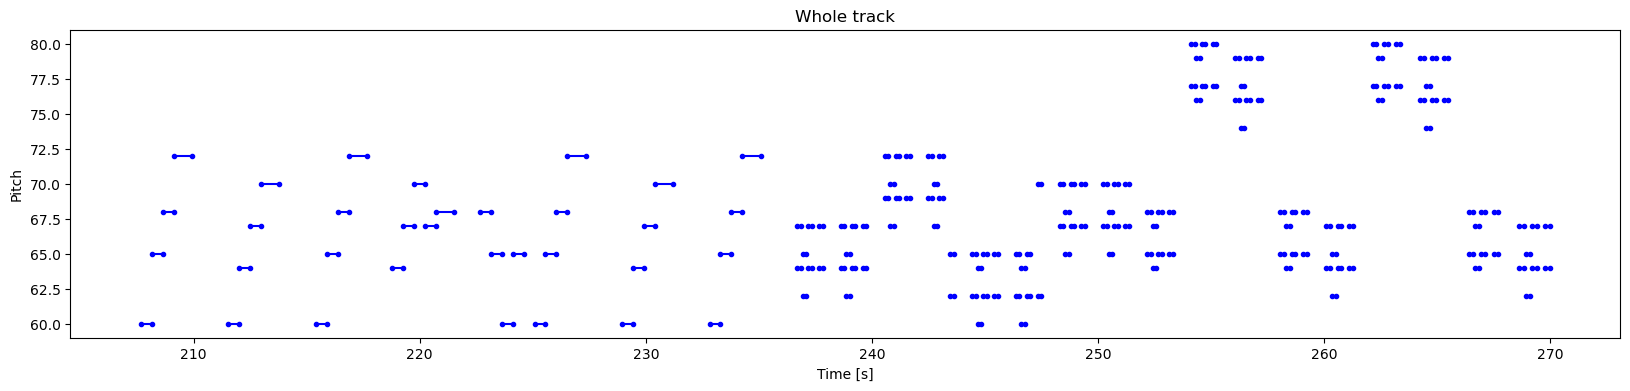

In [9]:
#绘制图表

def plot_piano_roll(notes: pd.DataFrame, count: Optional[int] = None):
  if count:
    title = f'First {count} notes'
  else:
    title = f'Whole track'
    count = len(notes['pitch'])
  plt.figure(figsize=(20, 4))
  plot_pitch = np.stack([notes['pitch'], notes['pitch']], axis=0)
  plot_start_stop = np.stack([notes['start'], notes['end']], axis=0)
  plt.plot(
      plot_start_stop[:, :count], plot_pitch[:, :count], color="b", marker=".")
  plt.xlabel('Time [s]')
  plt.ylabel('Pitch')
  _ = plt.title(title)

print('所有音符音高音长')
plot_piano_roll(raw_notes)

音符分布


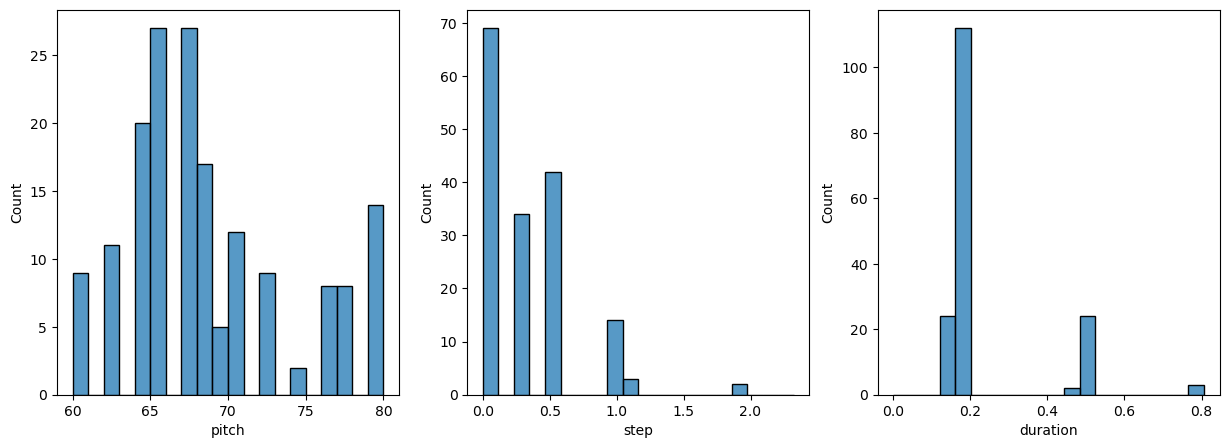

In [10]:
def plot_distributions(notes: pd.DataFrame, drop_percentile=2.5):
  plt.figure(figsize=[15, 5])
  plt.subplot(1, 3, 1)
  sns.histplot(notes, x="pitch", bins=20)

  plt.subplot(1, 3, 2)
  max_step = np.percentile(notes['step'], 100 - drop_percentile)
  sns.histplot(notes, x="step", bins=np.linspace(0, max_step, 21))

  plt.subplot(1, 3, 3)
  max_duration = np.percentile(notes['duration'], 100 - drop_percentile)
  sns.histplot(notes, x="duration", bins=np.linspace(0, max_duration, 21))

print('音符分布')
plot_distributions(raw_notes)

In [11]:
def notes_to_midi(
  notes: pd.DataFrame,
  out_file: str, 
  instrument_name: str,
  velocity: int = 100,  # note loudness
) -> pretty_midi.PrettyMIDI:

  pm = pretty_midi.PrettyMIDI()
  instrument = pretty_midi.Instrument(
      program=pretty_midi.instrument_name_to_program(
          instrument_name))

  prev_start = 0
  for i, note in notes.iterrows():
    start = float(prev_start + note['step'])
    end = float(start + note['duration'])
    note = pretty_midi.Note(
        velocity=velocity,
        pitch=int(note['pitch']),
        start=start,
        end=end,
    )
    instrument.notes.append(note)
    prev_start = start

  pm.instruments.append(instrument)
  pm.write(out_file)
  return pm

example_file = 'example.midi'
example_pm = notes_to_midi(
    raw_notes, out_file=example_file, instrument_name='violin')

display_audio(example_pm)

C:\Users\celan\mambaforge\envs\ml\lib\site-packages\pretty_midi\instrument.py:167: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if bend_int is not 0:
C:\Users\celan\mambaforge\envs\ml\lib\site-packages\pretty_midi\instrument.py:176: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if bend_int is not 0:
C:\Users\celan\mambaforge\envs\ml\lib\site-packages\pretty_midi\instrument.py:167: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if bend_int is not 0:
C:\Users\celan\mambaforge\envs\ml\lib\site-packages\pretty_midi\instrument.py:176: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if bend_int is not 0:


AttributeError: module 'fluidsynth' has no attribute 'Synth'

In [ ]:
#Create the training dataset
num_files = 5
all_notes = []
for f in 文件名[:num_files]:
  notes = midi_to_notes(f)
  all_notes.append(notes)

all_notes = pd.concat(all_notes)

n_notes = len(all_notes)
print('Number of notes parsed:', n_notes)

In [ ]:
key_order = ['pitch', 'step', 'duration']
train_notes = np.stack([all_notes[key] for key in key_order], axis=1)

notes_ds = tf.data.Dataset.from_tensor_slices(train_notes)
notes_ds.element_spec

In [ ]:
def create_sequences(
    dataset: tf.data.Dataset, 
    seq_length: int,
    vocab_size = 128,
) -> tf.data.Dataset:
  """Returns TF Dataset of sequence and label examples."""
  seq_length = seq_length+1

  # Take 1 extra for the labels
  windows = dataset.window(seq_length, shift=1, stride=1,
                              drop_remainder=True)

  # `flat_map` flattens the" dataset of datasets" into a dataset of tensors
  flatten = lambda x: x.batch(seq_length, drop_remainder=True)
  sequences = windows.flat_map(flatten)

  # Normalize note pitch
  def scale_pitch(x):
    x = x/[vocab_size,1.0,1.0]
    return x

  # Split the labels
  def split_labels(sequences):
    inputs = sequences[:-1]
    labels_dense = sequences[-1]
    labels = {key:labels_dense[i] for i,key in enumerate(key_order)}

    return scale_pitch(inputs), labels

  return sequences.map(split_labels, num_parallel_calls=tf.data.AUTOTUNE)

In [ ]:
seq_length = 25
vocab_size = 128
seq_ds = create_sequences(notes_ds, seq_length, vocab_size)
seq_ds.element_spec

In [ ]:
for seq, target in seq_ds.take(1):
  print('sequence shape:', seq.shape)
  print('sequence elements (first 10):', seq[0: 10])
  print()
  print('target:', target)

In [ ]:
batch_size = 64
buffer_size = n_notes - seq_length  # the number of items in the dataset
train_ds = (seq_ds
            .shuffle(buffer_size)
            .batch(batch_size, drop_remainder=True)
            .cache()
            .prefetch(tf.data.experimental.AUTOTUNE))

In [ ]:
train_ds.element_spec

In [ ]:
#Create and train the model
def mse_with_positive_pressure(y_true: tf.Tensor, y_pred: tf.Tensor):
  mse = (y_true - y_pred) ** 2
  positive_pressure = 10 * tf.maximum(-y_pred, 0.0)
  return tf.reduce_mean(mse + positive_pressure)

In [ ]:
input_shape = (seq_length, 3)
learning_rate = 0.005

inputs = tf.keras.Input(input_shape)
x = tf.keras.layers.LSTM(128)(inputs)

outputs = {
  'pitch': tf.keras.layers.Dense(128, name='pitch')(x),
  'step': tf.keras.layers.Dense(1, name='step')(x),
  'duration': tf.keras.layers.Dense(1, name='duration')(x),
}

model = tf.keras.Model(inputs, outputs)

loss = {
      'pitch': tf.keras.losses.SparseCategoricalCrossentropy(
          from_logits=True),
      'step': mse_with_positive_pressure,
      'duration': mse_with_positive_pressure,
}

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(loss=loss, optimizer=optimizer)

model.summary()

In [ ]:
losses = model.evaluate(train_ds, return_dict=True)
losses

In [ ]:
#手动正则化？

model.compile(
    loss=loss,
    loss_weights={
        'duration':1,
        'pitch': 1,
        'step': 1,
    },
    optimizer=optimizer,
)

model.evaluate(train_ds, return_dict=True)

In [ ]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath='./training_checkpoints/ckpt_{epoch}',
        save_weights_only=True),
    tf.keras.callbacks.EarlyStopping(
        monitor='loss',
        patience=5,
        verbose=1,
        restore_best_weights=True),
]

In [ ]:
%%time
epochs = 50

history = model.fit(
    train_ds,
    epochs=epochs,
    callbacks=callbacks,
)

In [ ]:
plt.plot(history.epoch, history.history['loss'], label='total loss')
plt.show()

In [ ]:
#Generate notes
def predict_next_note(
    notes: np.ndarray, 
    keras_model: tf.keras.Model, 
    temperature: float = 1.0) -> int:
  """Generates a note IDs using a trained sequence model."""

  assert temperature > 0

  # Add batch dimension
  inputs = tf.expand_dims(notes, 0)

  predictions = model.predict(inputs)
  pitch_logits = predictions['pitch']
  step = predictions['step']
  duration = predictions['duration']

  pitch_logits /= temperature
  pitch = tf.random.categorical(pitch_logits, num_samples=1)
  pitch = tf.squeeze(pitch, axis=-1)
  duration = tf.squeeze(duration, axis=-1)
  step = tf.squeeze(step, axis=-1)

  # `step` and `duration` values should be non-negative
  step = tf.maximum(0, step)
  duration = tf.maximum(0, duration)

  return int(pitch), float(step), float(duration)

In [ ]:
temperature = 2.0
num_predictions = 120

sample_notes = np.stack([raw_notes[key] for key in key_order], axis=1)

# The initial sequence of notes; pitch is normalized similar to training
# sequences
input_notes = (
    sample_notes[:seq_length] / np.array([vocab_size, 1, 1]))

generated_notes = []
prev_start = 0
for _ in range(num_predictions):
  pitch, step, duration = predict_next_note(input_notes, model, temperature)
  start = prev_start + step
  end = start + duration
  input_note = (pitch, step, duration)
  generated_notes.append((*input_note, start, end))
  input_notes = np.delete(input_notes, 0, axis=0)
  input_notes = np.append(input_notes, np.expand_dims(input_note, 0), axis=0)
  prev_start = start

generated_notes = pd.DataFrame(
    generated_notes, columns=(*key_order, 'start', 'end'))

In [ ]:
generated_notes.head(10)

In [ ]:
out_file = 'output.mid'
out_pm = notes_to_midi(
    generated_notes, out_file=out_file, instrument_name=instrument_name)
display_audio(out_pm)

In [ ]:
plot_piano_roll(generated_notes)

In [ ]:
plot_distributions(generated_notes)

In [ ]:
from midi2audio import FluidSynth
fs = FluidSynth()
fs.midi_to_audio(out_file, 'tfoutput.mp3')